<a href="https://colab.research.google.com/github/erikhenzdias/finance_PROJECTS/blob/main/comparison_latAM_JPN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive
# drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
ibovespa_5_anos = pd.read_csv('/content/gdrive/MyDrive/^BVSP.csv', parse_dates=True)
ipc_mexico_5 = pd.read_csv('/content/gdrive/MyDrive/^MXX.csv', parse_dates=True)
nikkei_5_anos = pd.read_csv('/content/gdrive/MyDrive/^N225.csv', parse_dates=True)
merv_5_anos = pd.read_csv('/content/gdrive/MyDrive/^MERV.csv', parse_dates=True)


Mounted at /content/gdrive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ibovespa_5_anos.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-07,81093.0,81742.0,79923.0,80347.0,80347.0,3861200
1,2018-08-08,80347.0,80912.0,78966.0,79152.0,79152.0,3833800
2,2018-08-09,79171.0,79461.0,78156.0,78768.0,78768.0,3717400
3,2018-08-10,78766.0,78766.0,76043.0,76514.0,76514.0,0
4,2018-08-13,76513.0,77689.0,75931.0,77496.0,77496.0,3958200


Carregamos nossos dados e criamos nosso Dataframe e agora, temos uma noção dos dados dispostos nele. Sabemos as datas, os valores de abertura e fechamento (Open e Close, respectivamente) e sabemos a diferença no volume de ações negociadas.

Já que a data é a coluna chave, vamos setar ela para o índice. O que nós estamos buscando é criar, posteriormente, uma nova coluna que registre o percentual de evolução dos valores em relação ao dia antecessor à ele.

In [ ]:
ibov_5_anos = ibovespa_5_anos.set_index('Date')

Começamos pelo mais simples que, neste caso, é a diferença de volume ao passar dos dias mas vamos aproveitar para calcular outras diferenças nos valores:

In [ ]:
ibov_5_anos['Evolução em volume'] = ibov_5_anos['Volume'].diff()
ibov_5_anos['Evolução OPEN em relação a OPEN anterior'] = ibov_5_anos['Open'].diff()
ibov_5_anos['Diferença entre valores de OPEN e CLOSE'] = ibov_5_anos['Open'] - ibov_5_anos['Close']
ibov_5_anos['Ev. % Open'] = ibov_5_anos['Open'].pct_change()
ibov_5_anos['Ev. % Close'] = ibov_5_anos['Close'].pct_change()
ibov_5_anos['Ev. % High'] = ibov_5_anos['High'].pct_change()
ibov_5_anos['Ev. % Vol'] = ibov_5_anos['Volume'].pct_change()

ibov_5_anos.fillna(0,inplace=True)

ibov_5_anos.head(25)

,Open,High,Low,Close,Adj Close,Volume,Evolução em volume,Evolução OPEN em relação a OPEN anterior,Diferença entre valores de OPEN e CLOSE,Ev. % Open,Ev. % Close,Ev. % High,Ev. % Vol
Date,,,,,,,,,,,,,
2018-08-07,81093.0,81742.0,79923.0,80347.0,80347.0,3861200,0.0,0.0,746.0,0.000000,0.000000,0.000000,0.000000
2018-08-08,80347.0,80912.0,78966.0,79152.0,79152.0,3833800,-27400.0,-746.0,1195.0,-0.009199,-0.014873,-0.010154,-0.007096
2018-08-09,79171.0,79461.0,78156.0,78768.0,78768.0,3717400,-116400.0,-1176.0,403.0,-0.014637,-0.004851,-0.017933,-0.030362
2018-08-10,78766.0,78766.0,76043.0,76514.0,76514.0,0,-3717400.0,-405.0,2252.0,-0.005116,-0.028616,-0.008746,-1.000000
2018-08-13,76513.0,77689.0,75931.0,77496.0,77496.0,3958200,3958200.0,-2253.0,-983.0,-0.028604,0.012834,-0.013673,inf
2018-08-14,77499.0,78742.0,77499.0,78602.0,78602.0,3713000,-245200.0,986.0,-1103.0,0.012887,0.014272,0.013554,-0.061947
2018-08-15,78614.0,78618.0,76829.0,77078.0,77078.0,4386400,673400.0,1115.0,1536.0,0.014387,-0.019389,-0.001575,0.181363
2018-08-16,77085.0,77704.0,76381.0,76819.0,76819.0,3285400,-1101000.0,-1529.0,266.0,-0.019449,-0.003360,-0.011626,-0.251003
2018-08-17,76817.0,76817.0,75633.0,76029.0,76029.0,3742300,456900.0,-268.0,788.0,-0.003477,-0.010284,-0.011415,0.139070


Você pode estar estranhando o porquê de eu não estar assumindo o valor de fechamento de um dia como o valor de abertura do dia seguinte e isso é uma dúvida normal como uma resposta bem simples:

O valor de abertura é o valor da primeira negociação do dia e o valor de fechamento é o valor da última negociação.

Vamos pensar assim: Uma empresa X fecha com um valor de 100 doláres por ação mas durante o período em que a bolsa está fechada, vaza uma notícia de que a contabilidade daquela empresa é fraudulenta. Até abrir a bolsa de valores, só com a repercussão desse caso, o valor especulado do mercado já mudou muito em relação a perspectiva do mercado em relação àquela ação ao anoitecer no dia anterior.


Text(0, 0.5, 'Volume')

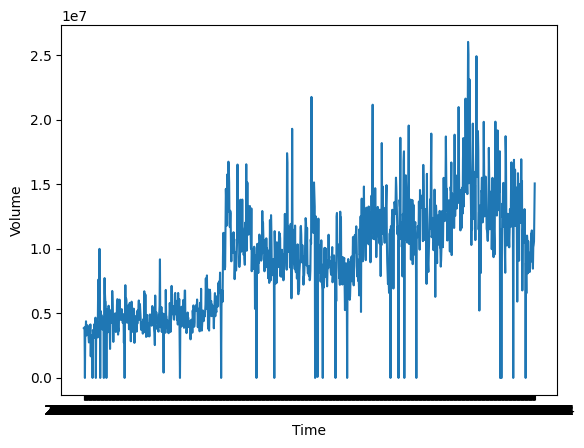

In [ ]:
fig, ax = plt.subplots()

ibov_mean_5 = ibov_5_anos['Volume'].rolling(window=30).mean()

ax.plot(ibov_5_anos.index, ibov_5_anos['Volume'])

ax.set_xlabel('Time')
ax.set_ylabel('Volume')

Com a figura acima, que é uma representação da variação de volume de ações que estão circulado na IBOVESPA. Como você pode ver, existe uma grande variação e uma tendência de aumento em quantidade de ações em circulação no mercado porém, da maneira como está demonstrada, fica difícil abstrair alguma coisa desse gráfico fora disso.


Então, para ter um pouco mais de abstração com nossas figuras, nós vamos plotar trechos diferentes com cores diferentes que representam a variação desse volume para esses períodos, padronizados em trechos de 1 ano. Adicionalmente, vamos ver a maneira como o número médio de ações variou durante esse período.

Text(0, 0.5, 'Volume')

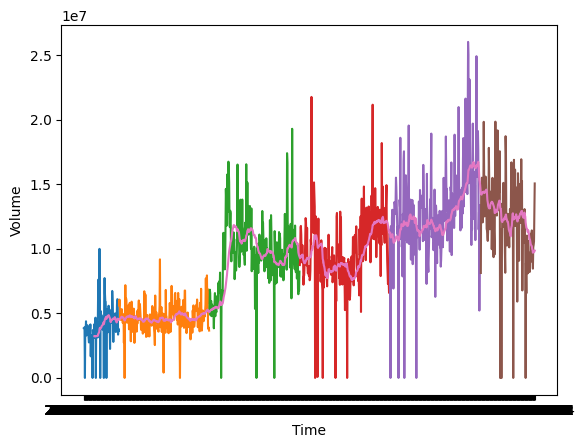

In [ ]:
ibov_2018 = ibov_5_anos['2018-01-01':'2018-12-31']
ibov_2019 = ibov_5_anos['2019-01-01':'2019-12-31']
ibov_2020 = ibov_5_anos['2020-01-01':'2020-12-31']
ibov_2021 = ibov_5_anos['2021-01-01':'2021-12-31']
ibov_2022 = ibov_5_anos['2022-01-01':'2022-12-31']
ibov_2023 = ibov_5_anos['2023-01-01':'2023-12-31']

fig, ax = plt.subplots()
ax.plot(ibov_2018.index, ibov_2018['Volume'])
ax.plot(ibov_2019.index, ibov_2019['Volume'])
ax.plot(ibov_2020.index, ibov_2020['Volume'])
ax.plot(ibov_2021.index, ibov_2021['Volume'])
ax.plot(ibov_2022.index, ibov_2022['Volume'])
ax.plot(ibov_2023.index, ibov_2023['Volume'])

ax.plot(ibov_5_anos.index, ibov_mean_5)

ax.set_xlabel('Time')
ax.set_ylabel('Volume')

Vamos, além de analisar a representação gráfica, analisar o perfil que os números pintam em relação ao ano de 2022 para a IBOVESPA e os últimos 5 anos e assim, observar se existe um padrão mantido ou se está diferente o perfil geral para essa bolsa:

In [ ]:
mean_vol_ex = ibov_2022['Ev. % Open'].mean()
print(mean_vol_ex)

mean_vol_12 = ibov_2022['Ev. % Close'].mean()
print(mean_vol_12)

mean_vol_13 = ibov_2022['Ev. % High'].mean()
print(mean_vol_13)

mean_vol_ex = ibov_2022['Evolução em volume'].mean()
print(mean_vol_ex)

mean_vol_ex = ibov_2022['Diferença entre valores de OPEN e CLOSE'].mean()
print(mean_vol_ex)

0.0003166737518182785
0.0002819321002715647
0.0002901041184129265
9004.0
-11.76


In [ ]:
mean_vol_ex1_total = ibov_5_anos['Ev. % Open'].mean()
print(mean_vol_ex1_total)

mean_vol_12_total = ibov_5_anos['Ev. % Close'].mean()
print(mean_vol_12_total)

mean_vol_13_total = ibov_5_anos['Ev. % High'].mean()
print(mean_vol_13_total)

mean_vol_ex_total2 = ibov_5_anos['Evolução em volume'].mean()
print(mean_vol_ex_total2)

mean_vol_ex_total = ibov_5_anos['Diferença entre valores de OPEN e CLOSE'].mean()
print(mean_vol_ex_total)

0.0004653847647188975
0.00046671251133001743
0.00039564742977758505
9042.776432606941
-28.766747376916868


Nós agora conseguimos ver a variação no volume, vamos passar para outra constante. Neste caso, valor de abertura de mercado.

Text(0, 0.5, 'Open value')

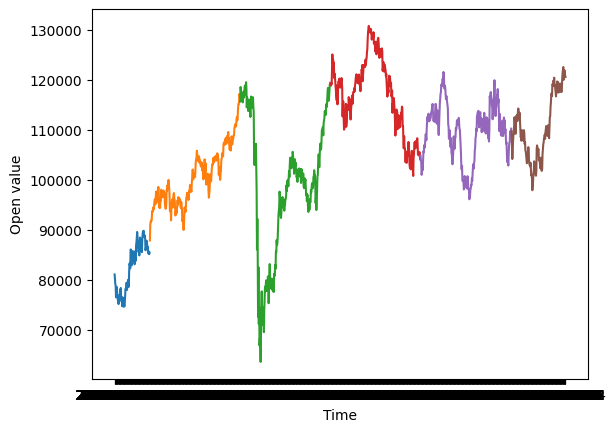

In [ ]:

fig, ax = plt.subplots()
ax.plot(ibov_2018.index, ibov_2018['Open'])
ax.plot(ibov_2019.index, ibov_2019['Open'])
ax.plot(ibov_2020.index, ibov_2020['Open'])
ax.plot(ibov_2021.index, ibov_2021['Open'])
ax.plot(ibov_2022.index, ibov_2022['Open'])
ax.plot(ibov_2023.index, ibov_2023['Open'])


ax.set_xlabel('Time')
ax.set_ylabel('Open value')

Por curiosidade, vamos visualizar o fato dos valores de fechamento serem muito similares aos de abertura e procurar por alguma anormalidade.

Text(0, 0.5, 'Closing value')

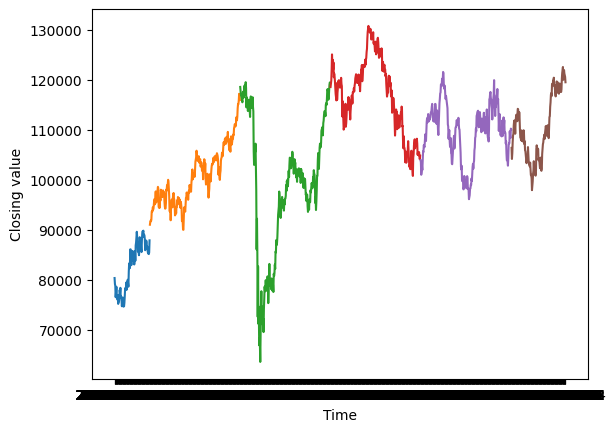

In [ ]:
fig, ax = plt.subplots()
ax.plot(ibov_2018.index, ibov_2018['Close'])
ax.plot(ibov_2019.index, ibov_2019['Close'])
ax.plot(ibov_2020.index, ibov_2020['Close'])
ax.plot(ibov_2021.index, ibov_2021['Close'])
ax.plot(ibov_2022.index, ibov_2022['Close'])
ax.plot(ibov_2023.index, ibov_2023['Close'])


ax.set_xlabel('Time')
ax.set_ylabel('Closing value')

Agora que temos uma noção superficial do comportamento dos dados, vamos comparar esse comportamento ao comportamento dos dados da bolsa mexicana de valores, a IPC MEXICO. Vamos realizar os mesmos passados que realizamos com a IBOVESPA para manter uma constância nos procedimentos.

In [ ]:
ipc_mexico_5.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-07,49411.378906,50071.988281,49411.378906,49963.871094,49963.871094,167824600
1,2018-08-08,49979.449219,49987.171875,49670.488281,49894.558594,49894.558594,107393100
2,2018-08-09,49931.519531,49957.000000,49218.851563,49244.398438,49244.398438,126922900
3,2018-08-10,49193.351563,49240.191406,48109.039063,48383.589844,48383.589844,178191700
4,2018-08-13,48383.730469,48902.128906,48365.050781,48767.019531,48767.019531,96122300


In [ ]:
ipc_mex_5 = ipc_mexico_5.set_index('Date')

In [ ]:
ipc_mex_5['Evolução em volume'] = ipc_mex_5['Volume'].diff()
ipc_mex_5['Evolução OPEN em relação a OPEN anterior'] = ipc_mex_5['Open'].diff()
ipc_mex_5['Diferença entre valores de OPEN e CLOSE'] = ipc_mex_5['Open'] - ipc_mex_5['Close']
ipc_mex_5['Ev. % Open'] = ipc_mex_5['Open'].pct_change()
ipc_mex_5['Ev. % Close'] = ipc_mex_5['Close'].pct_change()
ipc_mex_5['Ev. % High'] = ipc_mex_5['High'].pct_change()
ipc_mex_5['Ev. % Vol'] = ipc_mex_5['Volume'].pct_change()

ipc_mex_5.fillna(0,inplace=True)
ipc_mex_5.head(25)

,Open,High,Low,Close,Adj Close,Volume,Evolução em volume,Evolução OPEN em relação a OPEN anterior,Diferença entre valores de OPEN e CLOSE,Ev. % Open,Ev. % Close,Ev. % High,Ev. % Vol
Date,,,,,,,,,,,,,
2018-08-07,49411.378906,50071.988281,49411.378906,49963.871094,49963.871094,167824600,0.0,0.000000,-552.492188,0.000000,0.000000,0.000000,0.000000
2018-08-08,49979.449219,49987.171875,49670.488281,49894.558594,49894.558594,107393100,-60431500.0,568.070313,84.890625,0.011497,-0.001387,-0.001694,-0.360087
2018-08-09,49931.519531,49957.000000,49218.851563,49244.398438,49244.398438,126922900,19529800.0,-47.929688,687.121093,-0.000959,-0.013031,-0.000604,0.181853
2018-08-10,49193.351563,49240.191406,48109.039063,48383.589844,48383.589844,178191700,51268800.0,-738.167968,809.761719,-0.014784,-0.017480,-0.014349,0.403937
2018-08-13,48383.730469,48902.128906,48365.050781,48767.019531,48767.019531,96122300,-82069400.0,-809.621094,-383.289062,-0.016458,0.007925,-0.006866,-0.460568
2018-08-14,48815.710938,49267.671875,48789.859375,49096.128906,49096.128906,131514600,35392300.0,431.980469,-280.417968,0.008928,0.006749,0.007475,0.368201
2018-08-15,49033.171875,49054.238281,48468.531250,48556.691406,48556.691406,112472600,-19042000.0,217.460937,476.480469,0.004455,-0.010987,-0.004332,-0.144790
2018-08-16,48666.800781,48681.691406,47970.070313,48059.058594,48059.058594,142089600,29617000.0,-366.371094,607.742187,-0.007472,-0.010248,-0.007595,0.263326
2018-08-17,48065.218750,48308.980469,47879.078125,48264.628906,48264.628906,128370700,-13718900.0,-601.582031,-199.410156,-0.012361,0.004277,-0.007656,-0.096551


Plotamos uma noção geral da evolução de volume para a IPC MEXICO:

Text(0, 0.5, 'Volume')

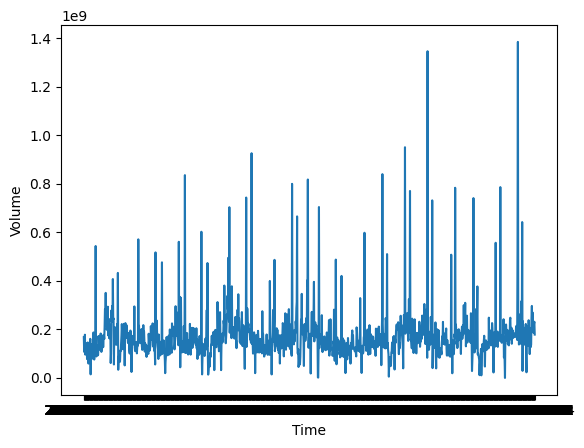

In [ ]:
fig, ax = plt.subplots()

ibov_mean_mex_5 = ipc_mex_5['Volume'].rolling(window=30).mean()

ax.plot(ipc_mex_5.index, ipc_mex_5['Volume'])

ax.set_xlabel('Time')
ax.set_ylabel('Volume')

Para analisarmos melhor, assim como faremos com a IBOVESPA, iremos fazer a divisão dos períodos anuais por cores.

Text(0, 0.5, 'Volume')

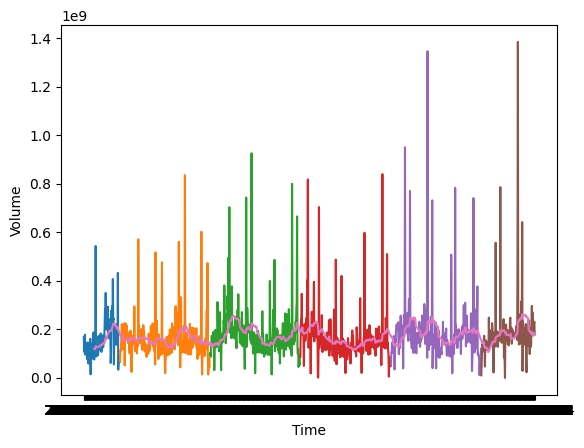

In [ ]:
ipc_mexico_2018 = ipc_mex_5['2018-01-01':'2018-12-31']
ipc_mexico_2019 = ipc_mex_5['2019-01-01':'2019-12-31']
ipc_mexico_2020 = ipc_mex_5['2020-01-01':'2020-12-31']
ipc_mexico_2021 = ipc_mex_5['2021-01-01':'2021-12-31']
ipc_mexico_2022 = ipc_mex_5['2022-01-01':'2022-12-31']
ipc_mexico_2023 = ipc_mex_5['2023-01-01':'2023-12-31']

fig, ax = plt.subplots()
ax.plot(ipc_mexico_2018.index, ipc_mexico_2018['Volume'])
ax.plot(ipc_mexico_2019.index, ipc_mexico_2019['Volume'])
ax.plot(ipc_mexico_2020.index, ipc_mexico_2020['Volume'])
ax.plot(ipc_mexico_2021.index, ipc_mexico_2021['Volume'])
ax.plot(ipc_mexico_2022.index, ipc_mexico_2022['Volume'])
ax.plot(ipc_mexico_2023.index, ipc_mexico_2023['Volume'])

ax.plot(ipc_mex_5.index, ibov_mean_mex_5)

ax.set_xlabel('Time')
ax.set_ylabel('Volume')

Text(0, 0.5, 'Open value')

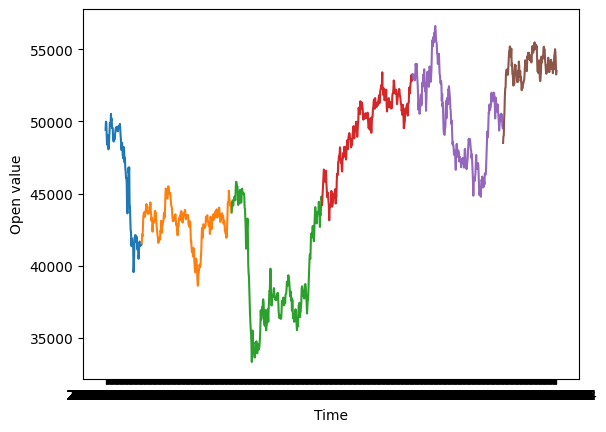

In [ ]:
fig, ax = plt.subplots()
ax.plot(ipc_mexico_2018.index, ipc_mexico_2018['Open'])
ax.plot(ipc_mexico_2019.index, ipc_mexico_2019['Open'])
ax.plot(ipc_mexico_2020.index, ipc_mexico_2020['Open'])
ax.plot(ipc_mexico_2021.index, ipc_mexico_2021['Open'])
ax.plot(ipc_mexico_2022.index, ipc_mexico_2022['Open'])
ax.plot(ipc_mexico_2023.index, ipc_mexico_2023['Open'])


ax.set_xlabel('Time')
ax.set_ylabel('Open value')

Nós vemos que o período em verde tem um comportamento similar ao que foi apresentado pela IBOVESPA, mas, observando, vemos o que aparenta ser uma duração maior desse período de baixa, equivalente a 2020 e consequentemente à pandemia.

Text(0, 0.5, 'Closing value')

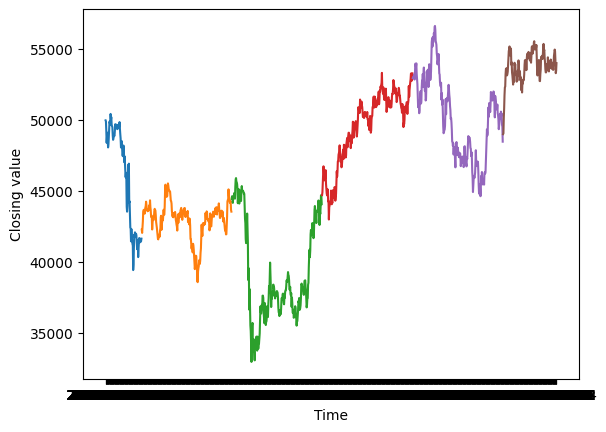

In [ ]:
fig, ax = plt.subplots()
ax.plot(ipc_mexico_2018.index, ipc_mexico_2018['Close'])
ax.plot(ipc_mexico_2019.index, ipc_mexico_2019['Close'])
ax.plot(ipc_mexico_2020.index, ipc_mexico_2020['Close'])
ax.plot(ipc_mexico_2021.index, ipc_mexico_2021['Close'])
ax.plot(ipc_mexico_2022.index, ipc_mexico_2022['Close'])
ax.plot(ipc_mexico_2023.index, ipc_mexico_2023['Close'])


ax.set_xlabel('Time')
ax.set_ylabel('Closing value')

Agora que nós traçamos os mesmos gráficos para a bolsa de valores mexicana, vamos puxar novamente os valores respectivos para analisarmos a diferença em dimensão entre eles já em termos de tendência, estão com comportamentos diferentes para os últimos 5 anos.

In [ ]:
mean_vol_ex_mex = ipc_mexico_2022['Ev. % Open'].mean()
print(mean_vol_ex_mex)

mean_vol_12_mex = ipc_mexico_2022['Ev. % Close'].mean()
print(mean_vol_12_mex)

mean_vol_13_mex = ipc_mexico_2022['Ev. % High'].mean()
print(mean_vol_13_mex)

mean_vol_ex_mex2 = ipc_mexico_2022['Evolução em volume'].mean()
print(mean_vol_ex_mex2)

mean_vol_opc_diff_mex = ipc_mexico_2022['Diferença entre valores de OPEN e CLOSE'].mean()
print(mean_vol_opc_diff_mex)

-0.0002231979213773901
-0.00031988669268649044
-0.00025054619372306855
282560.71428571426
25.460224472221952


VALORES RESPECTIVOS A IBOVESPA x IPC MEXICO para o ano de 2022

Ev. % Open -> 0.0003166737518182785 ; -0.0002231979213773901

Ev. % Close -> 0.0002819321002715647 ; -0.00031988669268649044

Ev. % High -> 0.0002901041184129265 ; -0.00025054619372306855

Evolução em volume -> 9004.0 ; 282560.71428571426

Diferença entre valores de OPEN e CLOSE -> -11.76 ; 25.460224472221952

In [ ]:
mean_vol_ex_mex5 = ipc_mex_5['Ev. % Open'].mean()
print(mean_vol_ex_mex5)

mean_vol_12_mex5 = ipc_mex_5['Ev. % Close'].mean()
print(mean_vol_12_mex5)

mean_vol_13_mex5 = ipc_mex_5['Ev. % High'].mean()
print(mean_vol_13_mex5)

mean_vol_ex_mex5 = ipc_mex_5['Evolução em volume'].mean()
print(mean_vol_ex_mex5)

mean_vol_opc_diff_mex5 = ipc_mex_5['Diferença entre valores de OPEN e CLOSE'].mean()
print(mean_vol_opc_diff_mex5)

0.00011504361727795319
0.00012327735250726871
0.00010526661781567438
8628.276409849086
11.514331189833081


VALORES RESPECTIVOS A IBOVESPA x IPC MEXICO para o período de 2018 - 2022

Ev. % Open -> 0.0004653847647188975 ; 0.00011504361727795319

Ev. % Close -> 0.00046671251133001743 ; 0.00012327735250726871

Ev. % High -> 0.00039564742977758505 ; 0.00010526661781567438

Evolução em volume -> 9042.776432606941 ; 8628.276409849086

Diferença entre valores de OPEN e CLOSE -> -28.766747376916868 ; 11.514331189833081


Vemos então, pela diferença entre as porcentagens positivas de abertura e de fechamento das negociações, que a bolsa IBOVESPA indica uma variação maior com um crescimento aliado a essa variação, embora seja uma bolsa com um volume significativamente menor, o que pode justificar a menor volatilidade da IPC MEXICO.

# ***FIM DO DIA 1***

Vamos começar o segundo dia trabalhando com essa base de dados, visualizando os dados anterior de maneiras diferentes e, como estamos trabalhando com ações, vamos usar o tradicional candlestick. Fazendo pesquisas sobre gráficos otimizados para candlestick, encontramos o plotly.graph_objects que nos permite fazer exatamente aquilo que queremos.

In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x = ibov_5_anos.index,
                                        open = ibov_5_anos["Open"],
                                        high = ibov_5_anos["High"],
                                        low = ibov_5_anos["Low"],
                                        close = ibov_5_anos["Close"])])
figure.update_layout(title = "Gráfico candlestick para análise comportamental das ações",
                     xaxis_rangeslider_visible = False)
figure.show()

E, além do feito anteriormente, podemos ver a evolução nos preços de OPEN e CLOSE de uma maneira alternativa aos gráficos de linhas traçados anteriormente.

In [ ]:
import plotly.express as px
figure = px.bar(ibov_5_anos, x = ibov_5_anos.index,
                y = "Close",
                title = "Time Series Analysis (Bar Plot)" )
figure.show()

In [ ]:
figure = px.bar(ibov_5_anos, x = ibov_5_anos.index,
                y = "Open",
                title = "Valor de abertura de mercado")
figure.show()

Por fim, fazemos uma visualização interativa que contemple o período completo dos dados indo de 2018 até Julho de 2023, com apenas algumas atualizações em relação ao gráfico candlestick original. Com essa visualização, podemos visualizar os valores de abertura, fechamento, o pico mais alto e o mais baixo apenas ao apertar de um botão.

In [ ]:
figure = go.Figure(data = [go.Candlestick(x = ibov_5_anos.index,
                                        open = ibov_5_anos["Open"],
                                        high = ibov_5_anos["High"],
                                        low = ibov_5_anos["Low"],
                                        close = ibov_5_anos["Close"])])
figure.update_layout(title = "Analise de série temporal com botões e slider IBOVESPA")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()

Conseguimos ver toda a evolução da bolsa IBOVESPA de maneira interativa, com direito a um slider embaixo do gráfico principal que nos permite visualizar cortes ainda mais customizados em relação aos períodos presentes nos botões; Vamos fazer esse gráfico para o IPC México também.

In [ ]:
figure = go.Figure(data = [go.Candlestick(x = ipc_mex_5.index,
                                        open = ipc_mex_5["Open"],
                                        high = ipc_mex_5["High"],
                                        low = ipc_mex_5["Low"],
                                        close = ipc_mex_5["Close"])])
figure.update_layout(title = "Analise de série temporal IPC MÉXICO")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()

# Algumas coisas podem ser vistas, mesmo que de maneira rudimentar, como:

1. Desde a troca de governo, nós vimos um aumento no preço de abertura da bolsa passando de 109k para 120k;
2. O impacto da pandemia foi muito mais significativa em termos proporcionais à IPC MÉXICO do que a IBOVESPA, porém, o crescimento posterior em relação ao ponto mais baixo da pandemia
3. Embora tenha tido um aumento no volume de ações negociadas na IBOVESPA, entre 25 de Janeiro e 30 de Março observamos um período de queda significativo que levou o número de ações de 114k para 97k e, atualmente, para 121k.
4. Em termos percentuais podemos ver que houve uma queda de quase -16% entre o fim de Janeiro e o Fim de Março mas, houve um aumento posterior de quase +25% em relação ao valor do fim de Março e de quase 9.8% em relação ao valor assumido originalmente pela nova administração.
5. Durante a pandemia, observamos uma diminuição no volume de ações negociadas pelo IPC MÉXICO que levou o volume de 45k para 33k, quase 27% de baixa em relação ao fim de Janeiro ao fim de Março.
6. Em compensação, a IPC MÉXICO alcançou um novo ponto máximo em relação aos últimos 5 anos, indo dos 33k negociados em Janeiro de 2020 para 56k em Janeiro de 2022, um aumento de +69.7%. Já a IBOVEPSA em seu ponto mais baixo da pandemia negociava a 63k, passando para quase 130k durante 2021, um aumento percentual de +106,7%, 50% a mais que a IPC MÉXICO para o mesmo período em termos superficiais. **Esse número é sujeito a adaptações para calculo da porcentagem com um nivelamento do volume de ambos.**

Agora, vamos investigar se existem correlações presentes nos dados.

In [ ]:
correlation_ibov = ibov_5_anos.corr()
correlation_mex = ipc_mex_5.corr()

print(correlation_ibov["Close"].sort_values(ascending=False))

Close                                       1.000000
Adj Close                                   1.000000
Low                                         0.997458
High                                        0.996252
Open                                        0.991617
Volume                                      0.261343
Ev. % High                                  0.056945
Ev. % Close                                 0.046389
Evolução OPEN em relação a OPEN anterior    0.043694
Ev. % Open                                  0.030752
Ev. % Vol                                   0.022080
Evolução em volume                         -0.001914
Diferença entre valores de OPEN e CLOSE    -0.057382
Name: Close, dtype: float64


In [ ]:
print(correlation_mex["Close"].sort_values(ascending=False))

Close                                       1.000000
Adj Close                                   1.000000
Low                                         0.998798
High                                        0.998739
Open                                        0.996747
Evolução OPEN em relação a OPEN anterior    0.055227
Ev. % High                                  0.053960
Ev. % Open                                  0.053312
Ev. % Close                                 0.046712
Ev. % Vol                                   0.007130
Evolução em volume                         -0.002917
Volume                                     -0.023303
Diferença entre valores de OPEN e CLOSE    -0.064191
Name: Close, dtype: float64


In [ ]:
ibov_5_anos['Close'].corr(ipc_mex_5['Close'])

0.5163452460745295

In [ ]:
ibov_5_anos['Open'].corr(ipc_mex_5['Open'])

0.5152044842814716

In [ ]:
ibov_5_anos['High'].corr(ipc_mex_5['High'])

0.5088812357602355

In [ ]:
ibov_5_anos['Low'].corr(ipc_mex_5['Low'])

0.5227911814754964

In [ ]:
ibov_5_anos['Ev. % Close'].corr(ipc_mex_5['Ev. % Close'])

0.5015337747513462

# Aqui nós temos uma limitação em relação as visualizações e medidas que podemos traçar para nossos objetivos atuais então vamos adicionar as bolsas argentinas e japonesas para agregar nas nossas manipulações atuais. Mais para frente, iremos combinar as bolsas e usar ML para começarmos a tentar utilizar técnicas preditivas

Vamos repetir o processo que fizemos anteriormente passo-a-passo para a IBOVESPA e para a ISP MEXICO mas agora com um pouco mais celeridade já que já sabemos o procedimento.

In [ ]:
nikk_5_anos = nikkei_5_anos.set_index('Date')
mrv_5_anos = merv_5_anos.set_index('Date')

In [ ]:
nikk_5_anos['Evolução em volume'] = nikk_5_anos['Volume'].diff()
nikk_5_anos['Evolução OPEN em relação a OPEN anterior'] = nikk_5_anos['Open'].diff()
nikk_5_anos['Diferença entre valores de OPEN e CLOSE'] = nikk_5_anos['Open'] - nikk_5_anos['Close']
nikk_5_anos['Ev. % Open'] = nikk_5_anos['Open'].pct_change()
nikk_5_anos['Ev. % Close'] = nikk_5_anos['Close'].pct_change()
nikk_5_anos['Ev. % High'] = nikk_5_anos['High'].pct_change()
nikk_5_anos['Ev. % Vol'] = nikk_5_anos['Volume'].pct_change()

nikk_5_anos.fillna(0,inplace=True)

nikk_5_anos.head(25)

,Open,High,Low,Close,Adj Close,Volume,Evolução em volume,Evolução OPEN em relação a OPEN anterior,Diferença entre valores de OPEN e CLOSE,Ev. % Open,Ev. % Close,Ev. % High,Ev. % Vol
Date,,,,,,,,,,,,,
2018-08-08,22666.560547,22800.609375,22610.289063,22644.310547,22644.310547,72800000.0,0.0,0.000000,22.250000,0.000000,0.000000,0.000000,0.000000
2018-08-09,22591.539063,22648.880859,22497.990234,22598.390625,22598.390625,61800000.0,-11000000.0,-75.021484,-6.851562,-0.003310,-0.002028,-0.006655,-0.151099
2018-08-10,22606.910156,22608.859375,22272.689453,22298.080078,22298.080078,73900000.0,12100000.0,15.371093,308.830078,0.000680,-0.013289,-0.001767,0.195793
2018-08-13,22117.570313,22124.599609,21851.320313,21857.429688,21857.429688,77800000.0,3900000.0,-489.339843,260.140625,-0.021646,-0.019762,-0.021419,0.052774
2018-08-14,22053.070313,22356.080078,22047.189453,22356.080078,22356.080078,59700000.0,-18100000.0,-64.500000,-303.009765,-0.002916,0.022814,0.010463,-0.232648
2018-08-15,22368.119141,22380.279297,22110.289063,22204.220703,22204.220703,61200000.0,1500000.0,315.048828,163.898438,0.014286,-0.006793,0.001082,0.025126
2018-08-16,21980.820313,22240.419922,21871.699219,22192.039063,22192.039063,77900000.0,16700000.0,-387.298828,-211.218750,-0.017315,-0.000549,-0.006249,0.272876
2018-08-17,22313.189453,22340.949219,22244.099609,22270.380859,22270.380859,56100000.0,-21800000.0,332.369140,42.808594,0.015121,0.003530,0.004520,-0.279846
2018-08-20,22267.070313,22288.310547,22150.750000,22199.000000,22199.000000,46800000.0,-9300000.0,-46.119140,68.070313,-0.002067,-0.003205,-0.002356,-0.165775


In [ ]:
mrv_5_anos['Evolução em volume'] = mrv_5_anos['Volume'].diff()
mrv_5_anos['Evolução OPEN em relação a OPEN anterior'] = mrv_5_anos['Open'].diff()
mrv_5_anos['Diferença entre valores de OPEN e CLOSE'] = mrv_5_anos['Open'] - mrv_5_anos['Close']
mrv_5_anos['Ev. % Open'] = mrv_5_anos['Open'].pct_change()
mrv_5_anos['Ev. % Close'] = mrv_5_anos['Close'].pct_change()
mrv_5_anos['Ev. % High'] = mrv_5_anos['High'].pct_change()
mrv_5_anos['Ev. % Vol'] = mrv_5_anos['Volume'].pct_change()

mrv_5_anos.fillna(0,inplace=True)

mrv_5_anos.head(25)

,Open,High,Low,Close,Adj Close,Volume,Evolução em volume,Evolução OPEN em relação a OPEN anterior,Diferença entre valores de OPEN e CLOSE,Ev. % Open,Ev. % Close,Ev. % High,Ev. % Vol
Date,,,,,,,,,,,,,
2018-08-08,27783.400391,27783.400391,26583.400391,26674.900391,26674.900391,0.0,0.0,0.000000,1108.500000,0.000000,0.000000,0.000000,0.0
2018-08-09,26674.900391,27248.099609,26643.900391,26906.300781,26906.300781,0.0,0.0,-1108.500000,-231.400390,-0.039898,0.008675,-0.019267,0.0
2018-08-10,26906.300781,26950.400391,25923.599609,26856.199219,26856.199219,0.0,0.0,231.400390,50.101562,0.008675,-0.001862,-0.010926,0.0
2018-08-13,26856.199219,26856.199219,25795.300781,26062.000000,26062.000000,0.0,0.0,-50.101562,794.199219,-0.001862,-0.029572,-0.003495,0.0
2018-08-14,26062.000000,26582.099609,26056.099609,26536.599609,26536.599609,0.0,0.0,-794.199219,-474.599609,-0.029572,0.018210,-0.010206,0.0
2018-08-15,26536.599609,27157.500000,26079.199219,27008.199219,27008.199219,0.0,0.0,474.599609,-471.599610,0.018210,0.017772,0.021646,0.0
2018-08-16,27008.199219,27356.300781,26544.000000,26938.800781,26938.800781,0.0,0.0,471.599610,69.398438,0.017772,-0.002570,0.007320,0.0
2018-08-17,26938.800781,26942.900391,26069.900391,26238.800781,26238.800781,0.0,0.0,-69.398438,700.000000,-0.002570,-0.025985,-0.015112,0.0
2018-08-21,26238.800781,26339.500000,26009.500000,26045.900391,26045.900391,0.0,0.0,-700.000000,192.900390,-0.025985,-0.007352,-0.022396,0.0


Analisando o .head() do Dataframe do NIKKEI225 e o do MERV, vemos que o NIKKEI225 está normal, com volume correto, já o MERV está com o volume igualado a zero devido ao formato emitido pelo Yahoo Finanças. Como nosso foco é analisar as alterações no valor e não no volume, iremos retornar posteriormente para realizar as devidas adaptações necessárias para adaptar a MRV.

Text(0, 0.5, 'Volume')

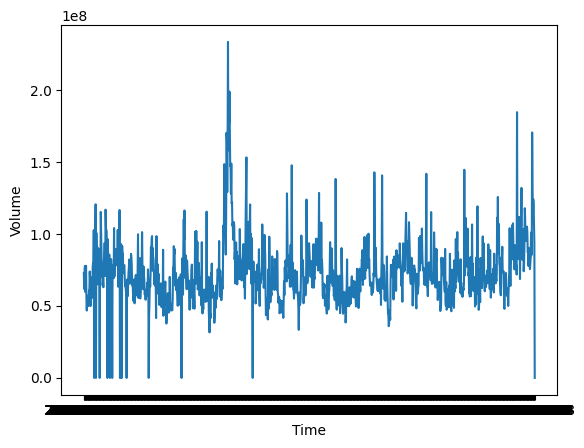

In [ ]:
fig, ax = plt.subplots()

nikk_mean_5v = nikk_5_anos['Volume'].rolling(window=30).mean()


ax.plot(nikk_5_anos.index, nikk_5_anos['Volume'])

ax.set_xlabel('Time')
ax.set_ylabel('Volume')

Plotanmos as alterações no volume da NIKKEI225 normalmente e, ao que tudo indica, é uma progressão sem nada muito destacado, fora dois picos ocasionais de aumento e despenca na quantidade de ações negociadas.

Text(0, 0.5, 'Close')

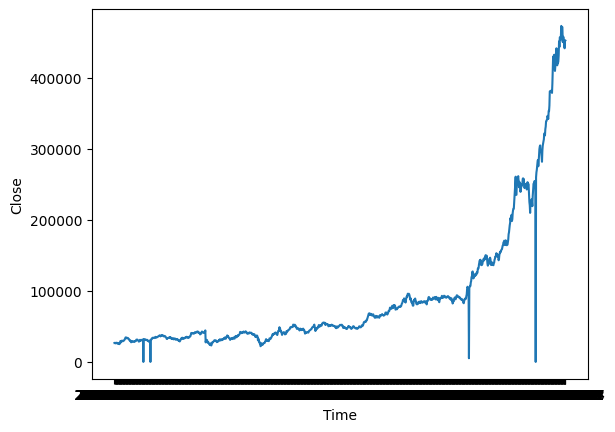

In [ ]:
fig, ax = plt.subplots()

mrv_mean_5v = mrv_5_anos['Close'].rolling(window=30).mean()

ax.plot(mrv_5_anos.index, mrv_5_anos['Close'])

ax.set_xlabel('Time')
ax.set_ylabel('Close')

Opa? O que temos aqui? Um aumento exponencial no valor de encerramento/fechamento das ações negociadas na MERV? Considerando que nós estamos contemplando o mesmo período (últimos 5 anos) para todas as bolsas, este comportamento que foi registrado é bem atípico. Vamos criar novas visualizações interativas para podermos acessar os valores com mais facilidade e ver se existe realmente algo exponencial ou se é apenas a visualização do gráfico que nos passa essa ideia.

Mas antes, vamos proceder com nossos gráficos normais que demonstram a evolução dos preços divididos em cores equivalentes aos anos respectivos.

Text(0, 0.5, 'Close')

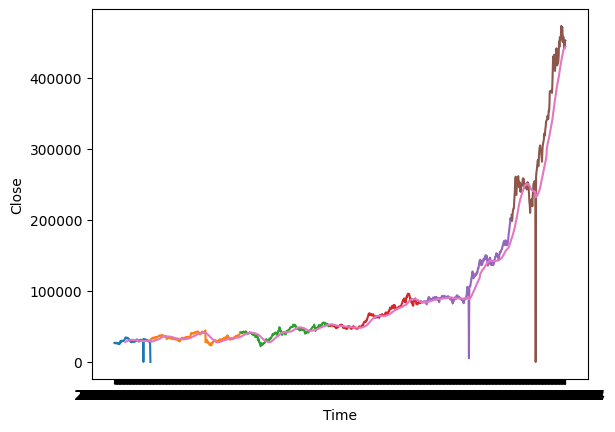

In [ ]:
mrv_2018 = mrv_5_anos['2018-01-01':'2018-12-31']
mrv_2019 = mrv_5_anos['2019-01-01':'2019-12-31']
mrv_2020 = mrv_5_anos['2020-01-01':'2020-12-31']
mrv_2021 = mrv_5_anos['2021-01-01':'2021-12-31']
mrv_2022 = mrv_5_anos['2022-01-01':'2022-12-31']
mrv_2023 = mrv_5_anos['2023-01-01':'2023-12-31']

fig, ax = plt.subplots()
ax.plot(mrv_2018.index, mrv_2018['Close'])
ax.plot(mrv_2019.index, mrv_2019['Close'])
ax.plot(mrv_2020.index, mrv_2020['Close'])
ax.plot(mrv_2021.index, mrv_2021['Close'])
ax.plot(mrv_2022.index, mrv_2022['Close'])
ax.plot(mrv_2023.index, mrv_2023['Close'])

ax.plot(mrv_5_anos.index, mrv_mean_5v)

ax.set_xlabel('Time')
ax.set_ylabel('Close')

Vemos que o príncipio desse crescimento é de 2021 mas se acentuou em 2022 e 2023.

Text(0, 0.5, 'Volume')

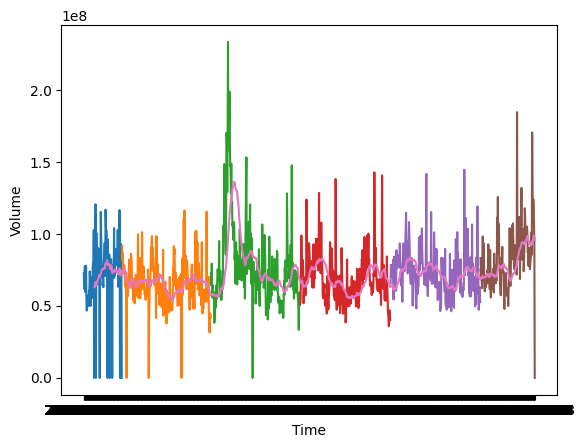

In [ ]:
nikk_2018 = nikk_5_anos['2018-01-01':'2018-12-31']
nikk_2019 = nikk_5_anos['2019-01-01':'2019-12-31']
nikk_2020 = nikk_5_anos['2020-01-01':'2020-12-31']
nikk_2021 = nikk_5_anos['2021-01-01':'2021-12-31']
nikk_2022 = nikk_5_anos['2022-01-01':'2022-12-31']
nikk_2023 = nikk_5_anos['2023-01-01':'2023-12-31']

fig, ax = plt.subplots()
ax.plot(nikk_2018.index, nikk_2018['Volume'])
ax.plot(nikk_2019.index, nikk_2019['Volume'])
ax.plot(nikk_2020.index, nikk_2020['Volume'])
ax.plot(nikk_2021.index, nikk_2021['Volume'])
ax.plot(nikk_2022.index, nikk_2022['Volume'])
ax.plot(nikk_2023.index, nikk_2023['Volume'])

ax.plot(nikk_5_anos.index, nikk_mean_5v)

ax.set_xlabel('Time')
ax.set_ylabel('Volume')

In [ ]:
figure = go.Figure(data = [go.Candlestick(x = nikk_5_anos.index,
                                        open = nikk_5_anos["Open"],
                                        high = nikk_5_anos["High"],
                                        low = nikk_5_anos["Low"],
                                        close = nikk_5_anos["Close"])])
figure.update_layout(title = "Analise de série temporal NIKKEI225 ")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()

Pronto! Agora que estamos traçando as figuras interativas podemos ver que a NIKKEI225 se manteve consideravelmente estável, uma interpretação que nós vamos puxar os números para descobrir se realmente é o caso.

In [ ]:
figure = go.Figure(data = [go.Candlestick(x = mrv_5_anos.index,
                                        open = mrv_5_anos["Open"],
                                        high = mrv_5_anos["High"],
                                        low = mrv_5_anos["Low"],
                                        close = mrv_5_anos["Close"])])
figure.update_layout(title = "Analise de série temporal MERV ")

figure.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
            dict(count = 1, label = "1m", step = "month", stepmode = "backward"),
            dict(count = 6, label = "6m", step = "month", stepmode = "backward"),
            dict(count = 1, label = "YTD", step = "year", stepmode = "todate"),
            dict(count = 1, label = "1y", step = "year", stepmode = "backward"),
            dict(step = "all")
        ])
    )
)
figure.show()

Já aqui na visualização interativa da MERV vemos que o crescimento que observamos antes realmente existe, tendo ido de 85k em Janeiro de 2022 para 470k no final de Julho de 2023. Esse crescimento foi de +452,94% em relação a àquele valor inicial. O valor de Janeiro de 2022 hoje corresponde a 18% do total da bolsa de Buenos Aires.

Agora que nós temos visualizações interativas para todas as bolsas carregadas no momento, sendo elas IBOVESPA, ISP MEXICO, NIKKEI225 E MERV, vamos testar novamente e ver se existem correlações maiores entre elas. Por exemplo, será se a bolsa de Buenos Aires (MERV) indica uma correlação maior do que com a IBOVESPA do que a do México?

In [ ]:
ibov_5_anos['Close'].corr(mrv_5_anos['Close'])

0.32907243317980983

In [ ]:
ibov_5_anos['Open'].corr(mrv_5_anos['Open'])

0.32867090399831694

In [ ]:
ibov_5_anos['Low'].corr(mrv_5_anos['Low'])

0.33109105350619294

In [ ]:
ibov_5_anos['High'].corr(mrv_5_anos['High'])

0.3286836710468237

Não! Essa é a nossa resposta. Mas seria seguro assumir que os mesmos fatores gerais afetam ambos os países, correto? Sim! Mas a MERV passou por um processo de crescimento exponencial nos valores que afeta drasticamente a pontuação da correlação já que é algo atípico um crescimento de 452%.

E a NIKKEI225?

In [ ]:
ibov_5_anos['Close'].corr(nikk_5_anos['Close'])

0.707960701978835

In [ ]:
ibov_5_anos['Open'].corr(nikk_5_anos['Open'])

0.7084880528610352

In [ ]:
ibov_5_anos['Low'].corr(nikk_5_anos['Low'])

0.7120790408738997

In [ ]:
ibov_5_anos['High'].corr(nikk_5_anos['High'])

0.7080789403523589

Curioso e inesperado! A bolsa japonesa, a Nikkei225, tem um grau de correlação maior com a IBOVESPA do que a bolsa do México e de Buenos Aires!

In [ ]:
mrv_no_exp = mrv_5_anos['2018-01-01':'2022-07-30']

In [ ]:
ibov_5_anos['Close'].corr(mrv_no_exp['Close'])

0.48688085223744393

In [ ]:
ibov_5_anos['Open'].corr(mrv_no_exp['Open'])

0.49025891780156794

In [ ]:
ibov_5_anos['Low'].corr(mrv_no_exp['Low'])

0.4911200243250989

In [ ]:
ibov_5_anos['High'].corr(mrv_no_exp['High'])

0.4876681668691648

Vemos aqui que sim! É um resultado direto desse ***boom!*** no valor das ações da bolsa de valores de Buenos Aires. Ao se retirar esse período e realizar uma correlação com os dados históricos, excluindo o período posterior a Agosto de 2022 para frente, vemos que o grau de correlação se aproxima muito do grau de correlação IBOVESPA - ISP México.